<a href="https://colab.research.google.com/github/One-Mountain/Machine-Learning/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.api._v2.keras.layers import BatchNormalization

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head(10)

--2023-10-31 20:23:39--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.19’

insurance.csv.19    100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-10-31 20:23:40 (4.40 MB/s) - ‘insurance.csv.19’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [ ]:
#changing categorical data into numerical
dataset["sex"] = pd.factorize(dataset['sex'])[0]
dataset["smoker"] = pd.factorize(dataset["smoker"])[0]
dataset["region"] = pd.factorize(dataset["region"])[0]
dataset.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86
5,31,0,25.7,0,1,1,3756.62
6,46,0,33.4,1,1,1,8240.59
7,37,0,27.7,3,1,2,7281.51
8,37,1,29.8,2,1,3,6406.41
9,60,0,25.8,0,1,2,28923.14


In [ ]:
#splitting data into training and testing.
test_dataset = dataset.sample(frac= 0.2)
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")
total_train = train_dataset.size
print(dataset.shape)
print(train_dataset.shape, train_labels.shape, test_dataset.shape, test_labels.shape)


(1338, 7)
(1070, 6) (1070,) (268, 6) (268,)


In [ ]:
#creating the model:
normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.25),
    layers.Dense(1),
])

In [ ]:
#build model:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.005),
    loss='mae',
    metrics=['mae', 'mse'],
)
model.build()
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_44 (Normaliz  (None, 6)                 13        
 ation)                                                          
                                                                 
 dense_148 (Dense)           (None, 16)                112       
                                                                 
 dense_149 (Dense)           (None, 4)                 68        
                                                                 
 dropout_82 (Dropout)        (None, 4)                 0         
                                                                 
 dense_150 (Dense)           (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
_____________

In [ ]:
epochs = 300
batch_sizes = 32
history = model.fit(
    train_dataset,
    train_labels,
    batch_size = batch_sizes,
    epochs=epochs,
    validation_split=0.1,
    verbose = 0
)

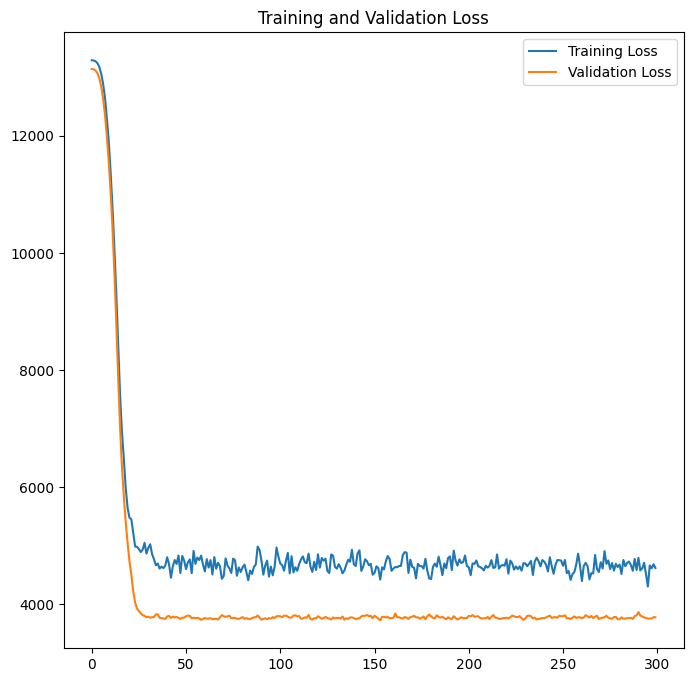

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

9/9 - 0s - loss: 3385.1072 - mae: 3385.1072 - mse: 36073772.0000 - 38ms/epoch - 4ms/step
Testing set Mean Abs Error: 3385.11 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


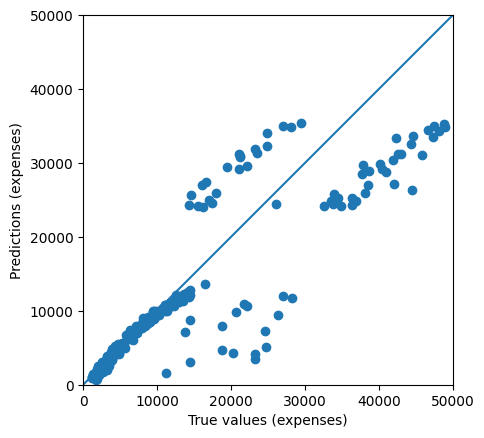

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
